<a href="https://colab.research.google.com/github/raybatais/Stock-analysis-project/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving stocks.zip to stocks.zip


In [ ]:
import zipfile
import os

#extract the uploaded zip file
with zipfile.ZipFile("stocks.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/stocks/historical_data")

print(os.listdir('/content/stocks/historical_data'))

['historical_data', 'GCF.csv', 'IRX.csv', 'MSFT.csv', 'BTC-USD.csv', 'NVDA.csv', 'FB.csv', 'ADBE.csv', 'TSLA.csv', 'TXN.csv', 'QCOM.csv', 'AMZN.csv', 'AAPL.csv']


In [ ]:
import pandas as pd
import glob

#We load all the files from thew zip

path = '/content/stocks/historical_data'
all_files = glob.glob(path + "/*.csv")

# Combine all CSVs into one DataFrame
dataframes = []
for file in all_files:
    # Extract the company name from the file name
    company_name = file.split('/')[-1].split('.')[0]  # Assumes filenames are like 'AAPL.csv'

    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Add a column for the company name
    df['Company'] = company_name

    # Append the DataFrame to the list
    dataframes.append(df)

# Combine all individual DataFrames into a single DataFrame
full_data = pd.concat(dataframes, ignore_index=True)

# Preview the combined DataFrame
print(full_data.head())

         Date         Open         High          Low        Close  Volume  \
0  2019-05-31  1287.699951  1306.400024  1287.500000  1305.800049    2814   
1  2019-06-03  1307.000000  1327.800049  1307.000000  1322.699951     812   
2  2019-06-04  1324.300049  1328.599976  1320.800049  1323.400024     302   
3  2019-06-05  1328.900024  1343.300049  1326.300049  1328.300049     622   
4  2019-06-06  1330.800049  1338.699951  1326.199951  1337.599976     161   

   Dividends  Stock Splits Company  
0        0.0           0.0     GCF  
1        0.0           0.0     GCF  
2        0.0           0.0     GCF  
3        0.0           0.0     GCF  
4        0.0           0.0     GCF  


Now start to Data Clean

In [ ]:
# Convert 'Date' to datetime format
full_data['Date'] = pd.to_datetime(full_data['Date'])

# Handle missing values (drop rows with missing data)
full_data = full_data.dropna()

# Sort data by Date and Company
full_data = full_data.sort_values(by=['Company', 'Date'])

# Preview cleaned data
print(full_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6461 entries, 5935 to 4882
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6461 non-null   datetime64[ns]
 1   Open          6461 non-null   float64       
 2   High          6461 non-null   float64       
 3   Low           6461 non-null   float64       
 4   Close         6461 non-null   float64       
 5   Volume        6461 non-null   int64         
 6   Dividends     6461 non-null   float64       
 7   Stock Splits  6461 non-null   float64       
 8   Company       6461 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 504.8+ KB
None


In [ ]:
# Calculate daily percentage change
full_data['Daily Change %'] = (full_data['Close'] - full_data['Open']) / full_data['Open'] * 100

# Add 20-day moving average
full_data['Moving Average'] = full_data.groupby('Company')['Close'].transform(lambda x: x.rolling(window=20).mean())

# Preview data with new features
print(full_data.head())

           Date       Open       High        Low      Close     Volume  \
5935 2019-05-31  43.181805  43.613062  42.877969  42.897572  108174400   
5936 2019-06-03  43.027439  43.595909  41.721424  42.463867  161584400   
5937 2019-06-04  42.988224  44.063910  42.762796  44.017353  123872000   
5938 2019-06-05  45.154295  45.328268  44.384898  44.727940  119093600   
5939 2019-06-06  44.860258  45.445882  44.632378  45.384624   90105200   

      Dividends  Stock Splits Company  Daily Change %  Moving Average  
5935        0.0           0.0    AAPL       -0.658224             NaN  
5936        0.0           0.0    AAPL       -1.309797             NaN  
5937        0.0           0.0    AAPL        2.393979             NaN  
5938        0.0           0.0    AAPL       -0.944218             NaN  
5939        0.0           0.0    AAPL        1.168888             NaN  


In [ ]:
# Save to CSV
full_data.to_csv('cleaned_stock_data.csv', index=False)

# Download the file to your local system
from google.colab import files
files.download('cleaned_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

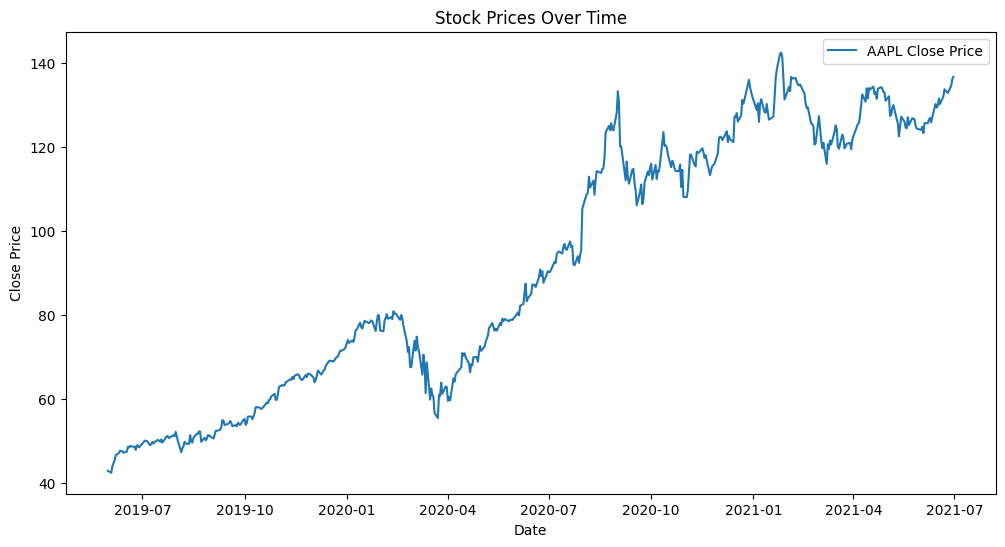

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot stock prices for a single company
company_data = full_data[full_data['Company'] == 'AAPL']
plt.figure(figsize=(12, 6))
plt.plot(company_data['Date'], company_data['Close'], label='AAPL Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

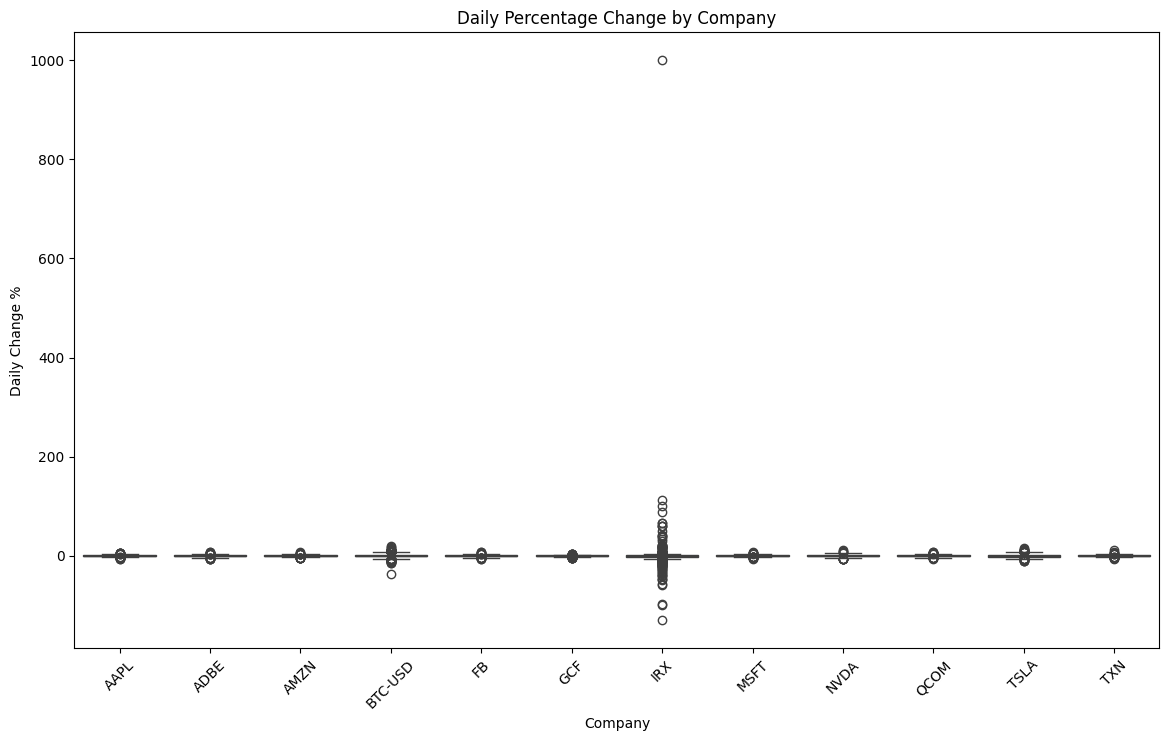

In [ ]:
# Plot daily percentage change for all companies
plt.figure(figsize=(14, 8))
sns.boxplot(data=full_data, x='Company', y='Daily Change %')
plt.title('Daily Percentage Change by Company')
plt.xticks(rotation=45)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/hrym2k7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/lvqzhhlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89796', 'data', 'file=/tmp/tmpxwzzb_97/hrym2k7p.json', 'init=/tmp/tmpxwzzb_97/lvqzhhlq.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelm351i8u9/prophet_model-20241222133329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:33:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


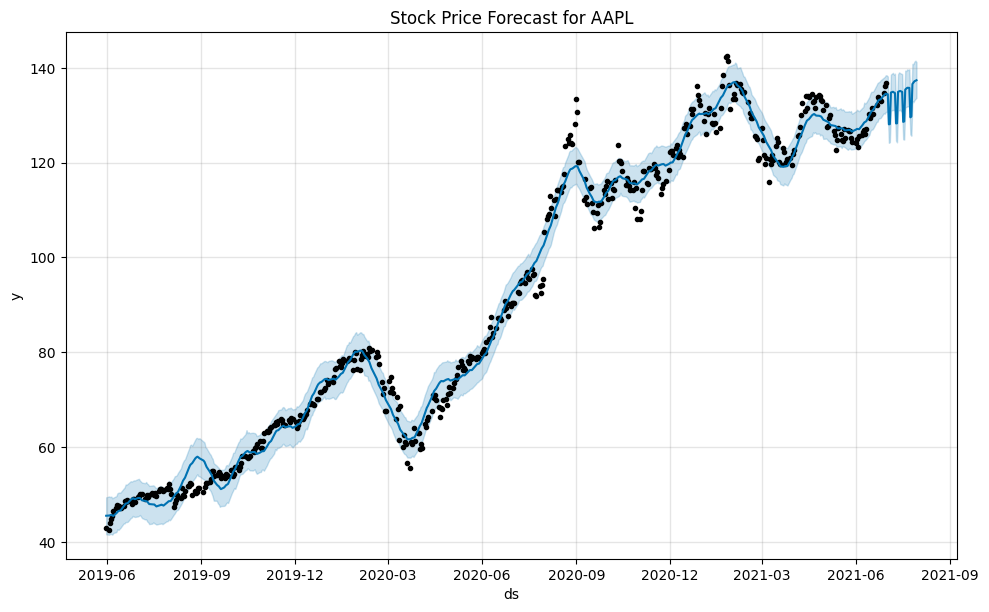

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
company_data = full_data[full_data['Company'] == 'AAPL']
prophet_df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Fit the model
model = Prophet()
model.fit(prophet_df)

# Make future predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot predictions
model.plot(forecast)
plt.title('Stock Price Forecast for AAPL')
plt.show()

Now repeat for each of the 12 companies

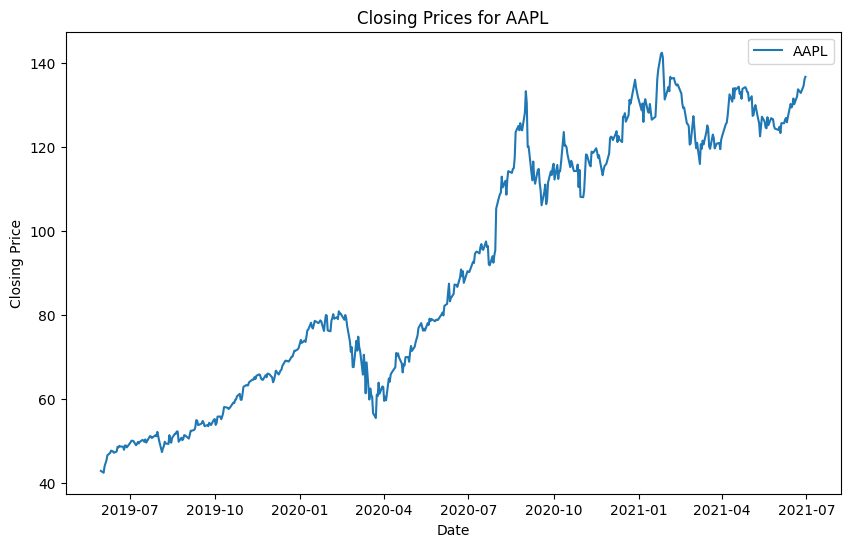

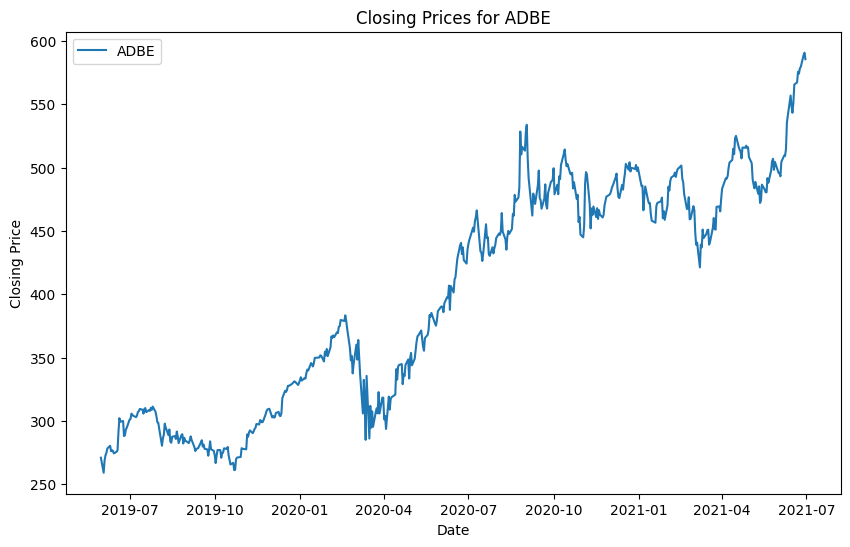

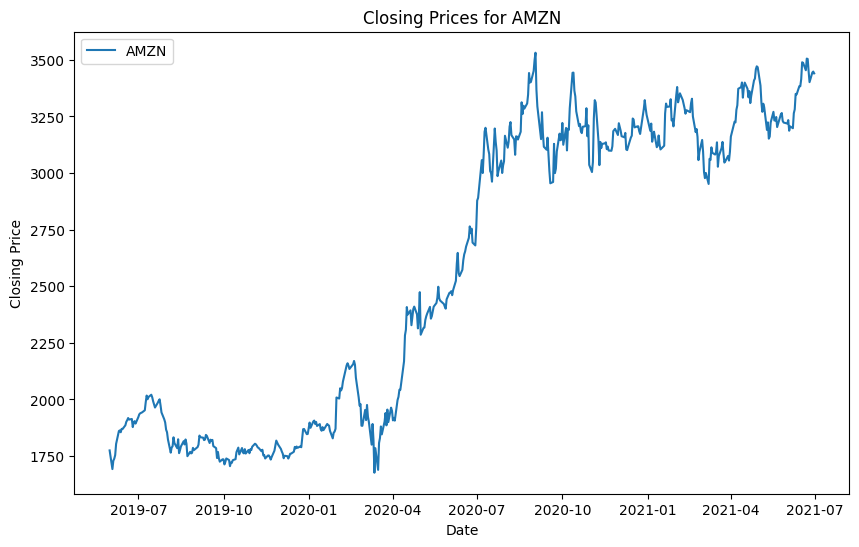

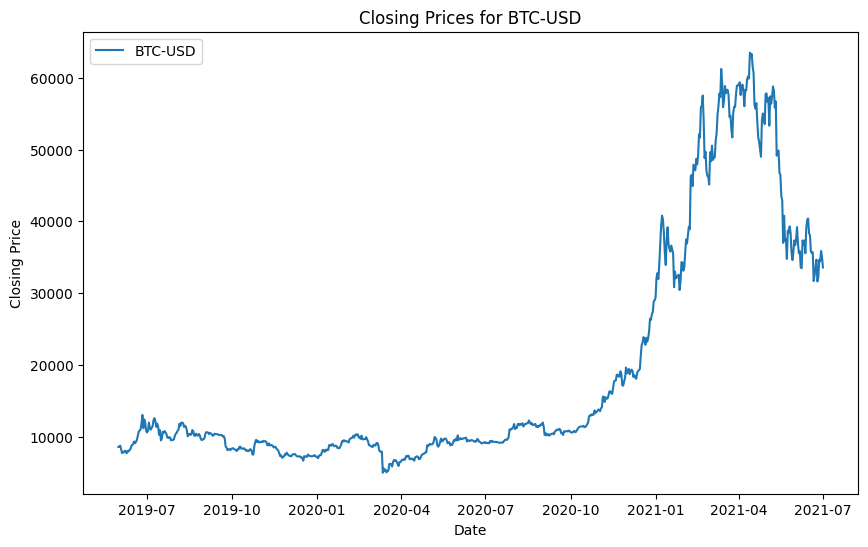

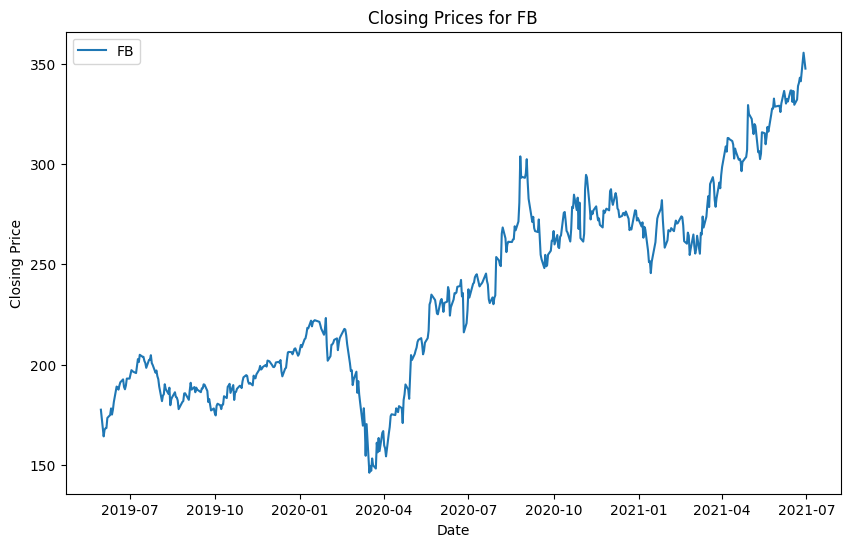

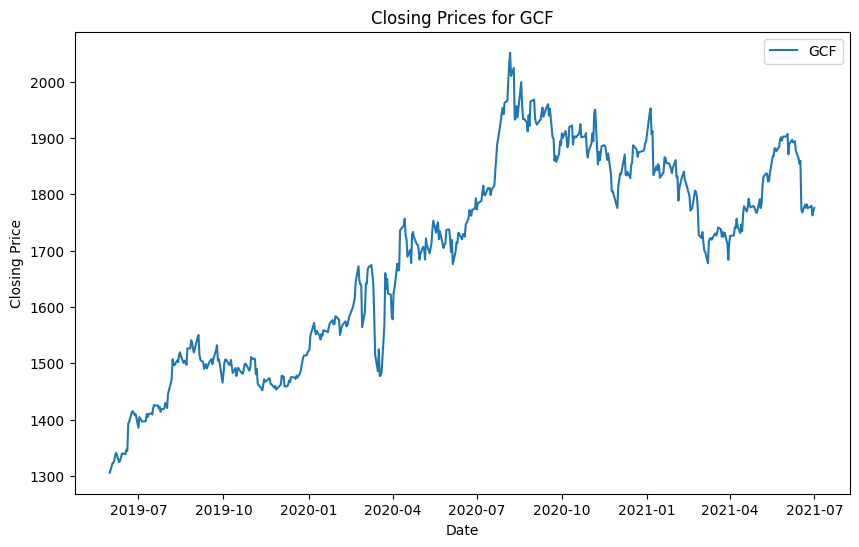

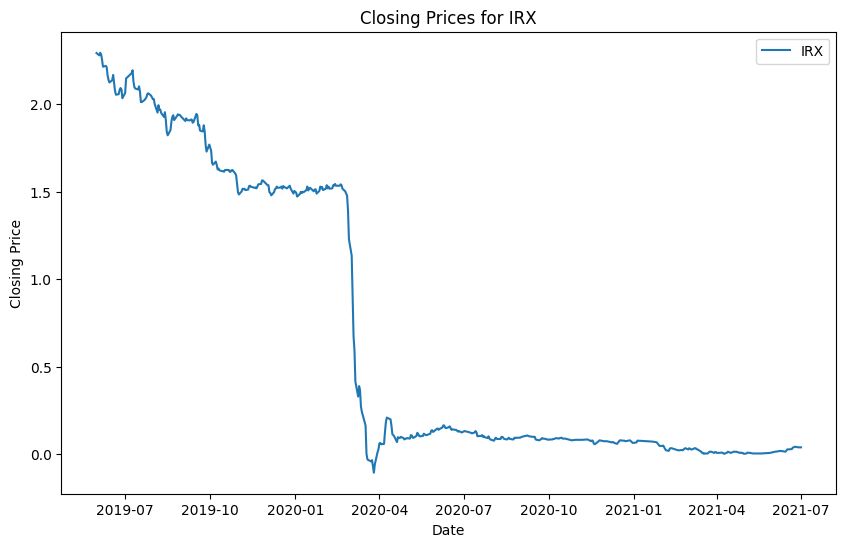

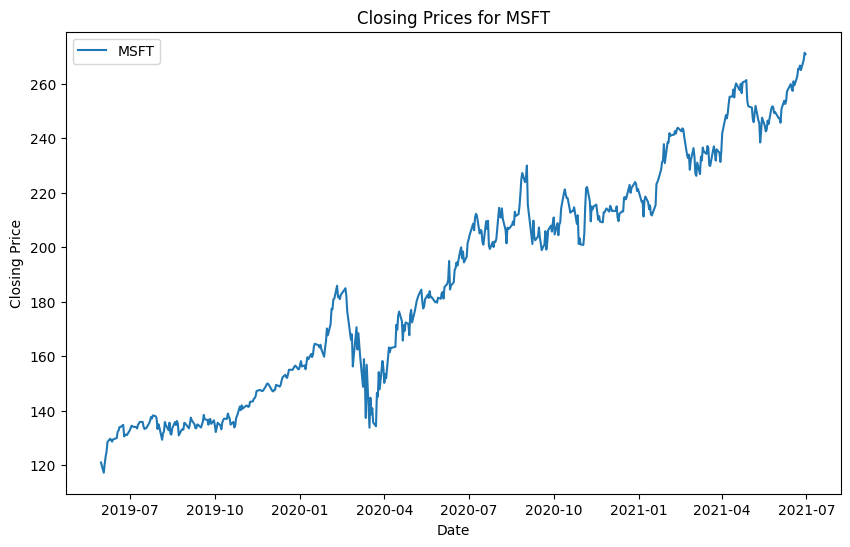

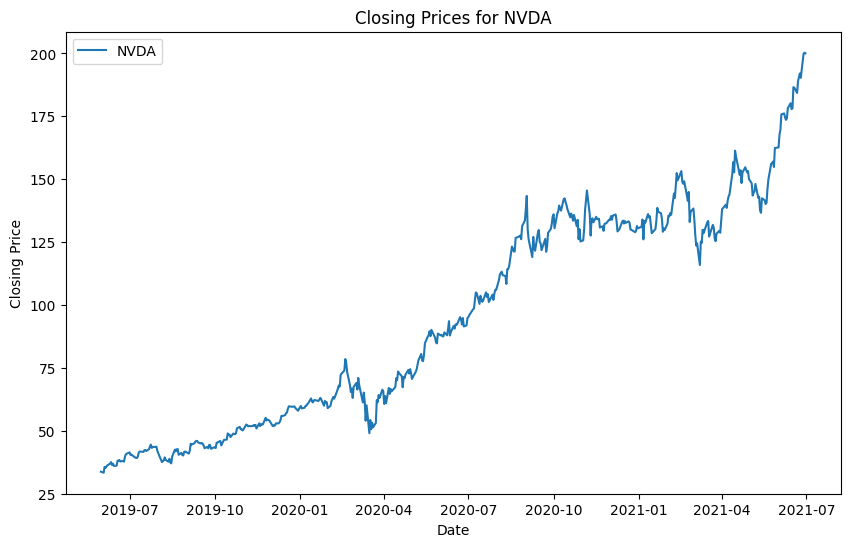

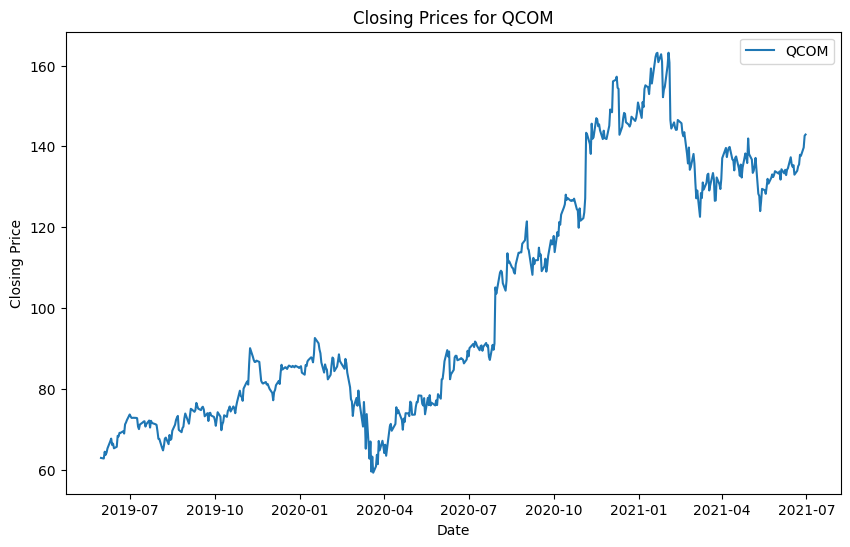

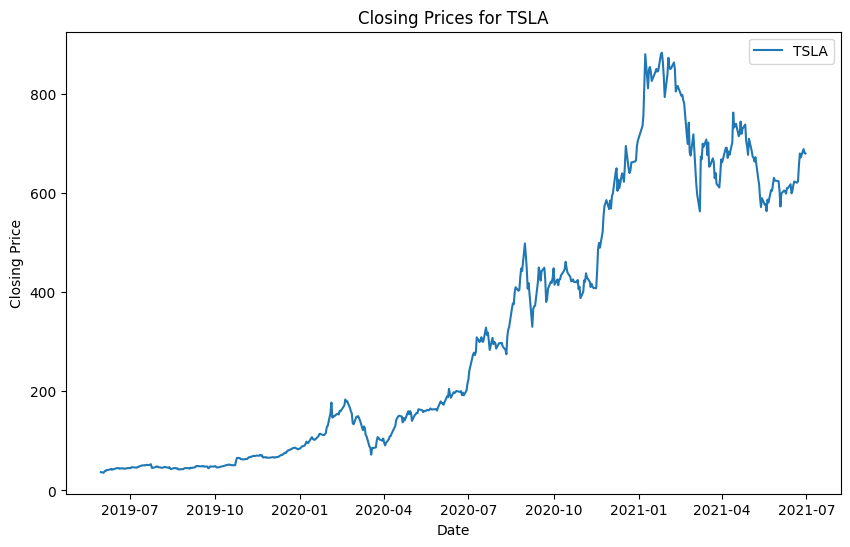

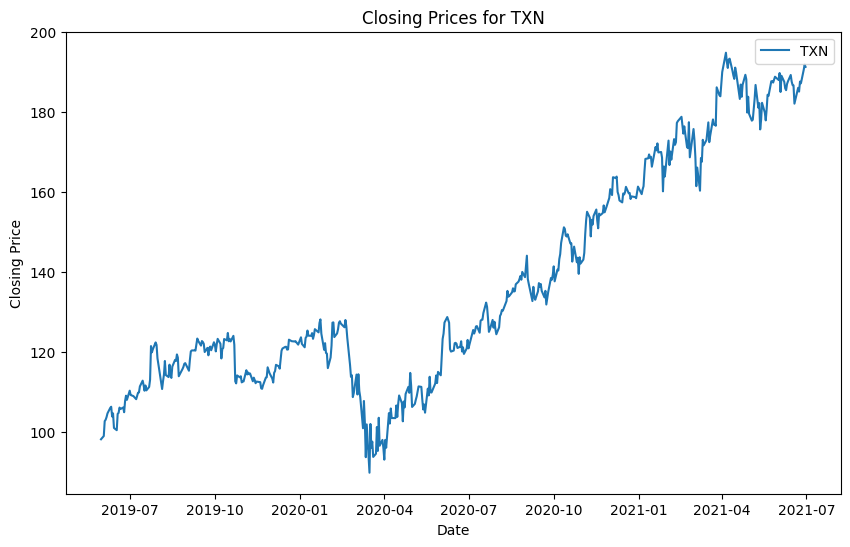

In [ ]:
# Plot stock prices for a single company
company_data = full_data[full_data['Company'] == 'AAPL']
plt.figure(figsize=(12, 6))
plt.plot(company_data['Date'], company_data['Close'], label='AAPL Close Price')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/b7svshgn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/mljijltl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24004', 'data', 'file=/tmp/tmpxwzzb_97/b7svshgn.json', 'init=/tmp/tmpxwzzb_97/mljijltl.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model5je8dq4m/prophet_model-20241222134915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


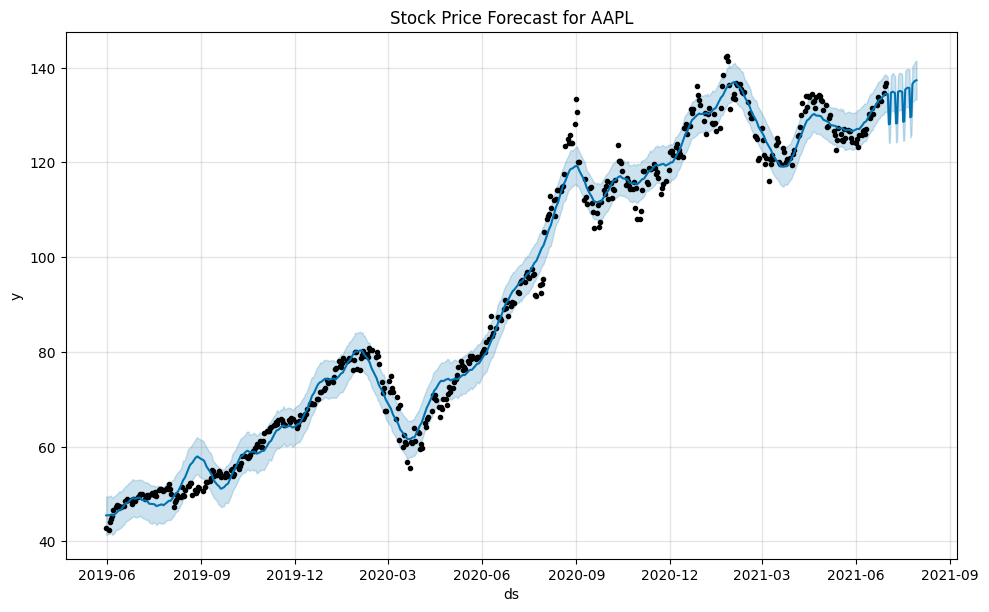

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/9m19zw9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/lu326boa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86566', 'data', 'file=/tmp/tmpxwzzb_97/9m19zw9s.json', 'init=/tmp/tmpxwzzb_97/lu326boa.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelnhy56s8q/prophet_model-20241222134916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


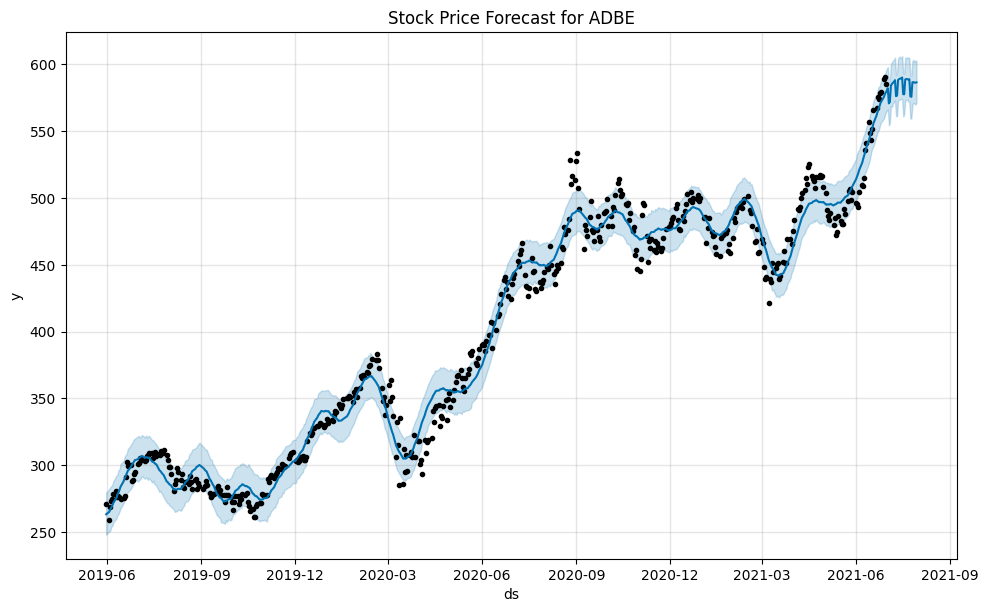

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/bamm6m5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/y8kzor6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70412', 'data', 'file=/tmp/tmpxwzzb_97/bamm6m5_.json', 'init=/tmp/tmpxwzzb_97/y8kzor6x.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelqz41qer0/prophet_model-20241222134917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


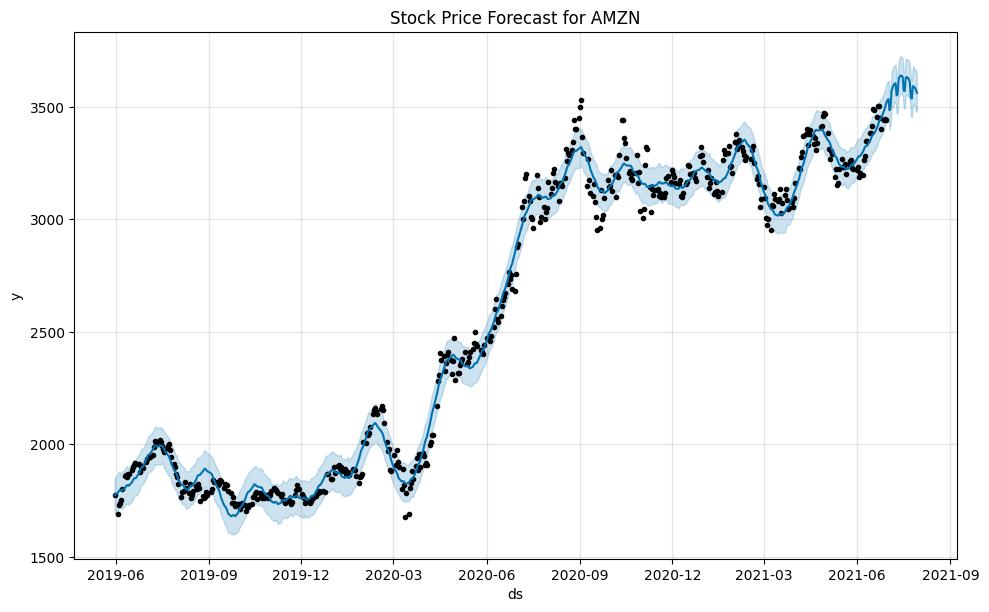

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/ynor6rng.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/pamdg8cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59325', 'data', 'file=/tmp/tmpxwzzb_97/ynor6rng.json', 'init=/tmp/tmpxwzzb_97/pamdg8cd.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model913q0tzi/prophet_model-20241222134918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


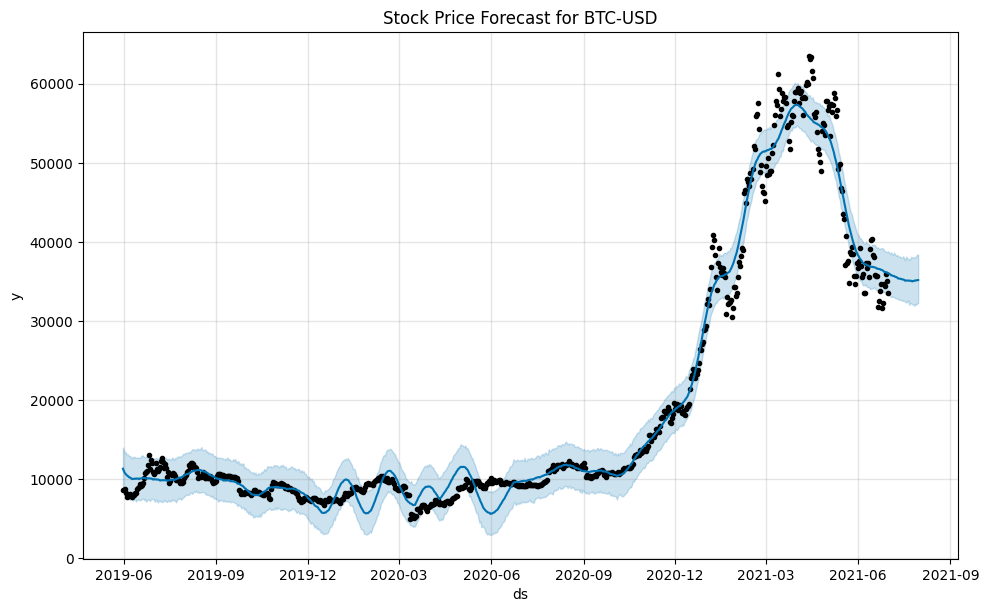

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/2y0ysq_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/dw0mimd3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6457', 'data', 'file=/tmp/tmpxwzzb_97/2y0ysq_d.json', 'init=/tmp/tmpxwzzb_97/dw0mimd3.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model9m7gg_5s/prophet_model-20241222134918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


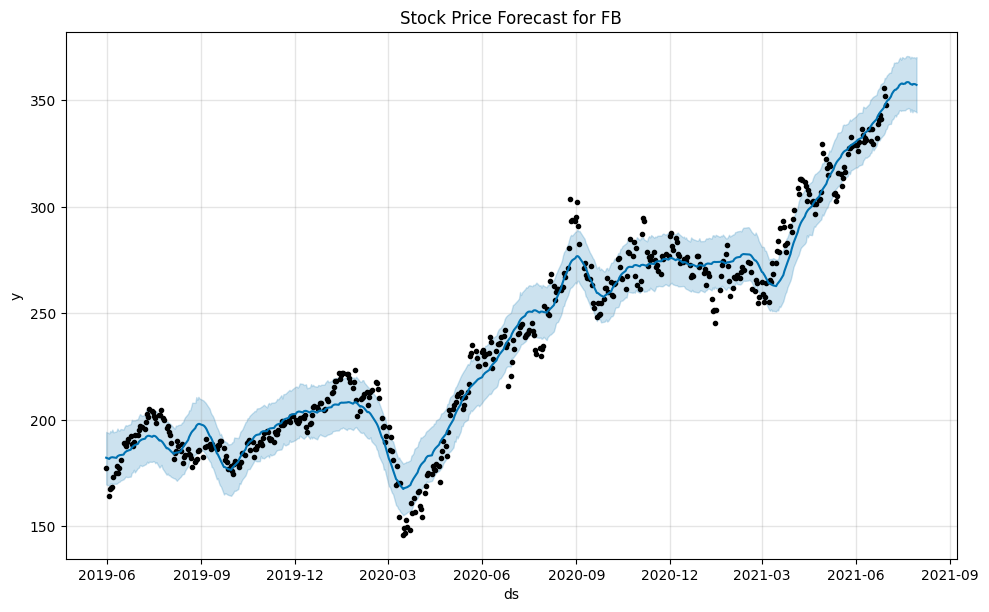

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/k75mmhe5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/4f4a98io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27676', 'data', 'file=/tmp/tmpxwzzb_97/k75mmhe5.json', 'init=/tmp/tmpxwzzb_97/4f4a98io.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelf3h_41ez/prophet_model-20241222134919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


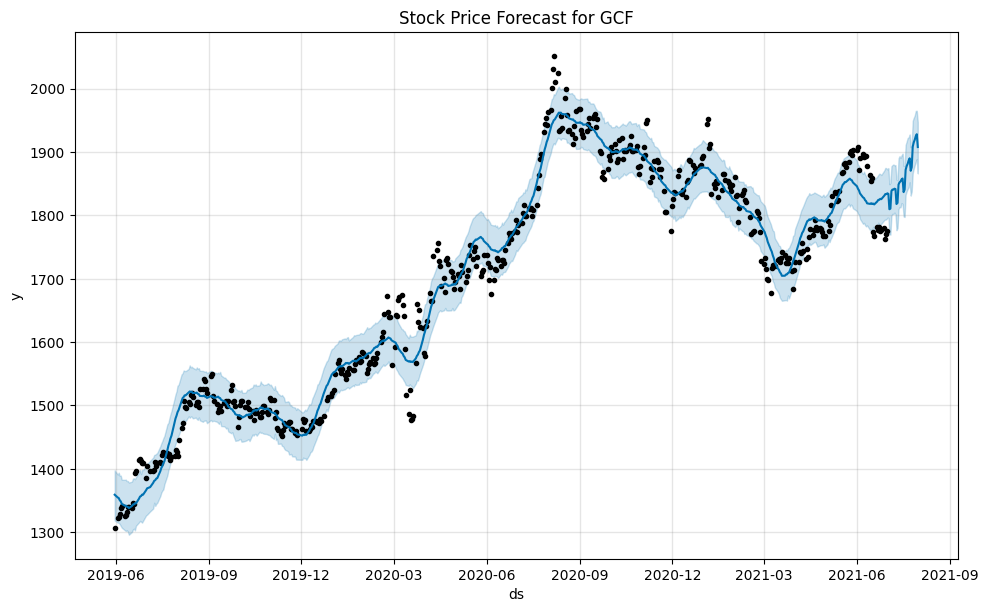

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/pm7umgk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/aovr751u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32288', 'data', 'file=/tmp/tmpxwzzb_97/pm7umgk0.json', 'init=/tmp/tmpxwzzb_97/aovr751u.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model145j8pm5/prophet_model-20241222134921.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


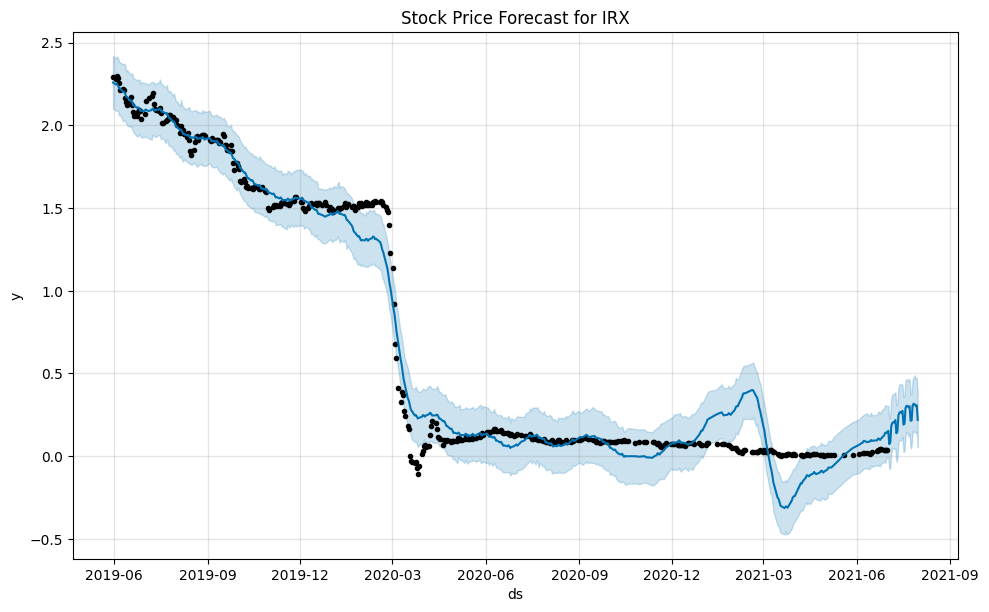

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/ggnpphgt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/yfntyq52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60856', 'data', 'file=/tmp/tmpxwzzb_97/ggnpphgt.json', 'init=/tmp/tmpxwzzb_97/yfntyq52.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelu7nrbbll/prophet_model-20241222134922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


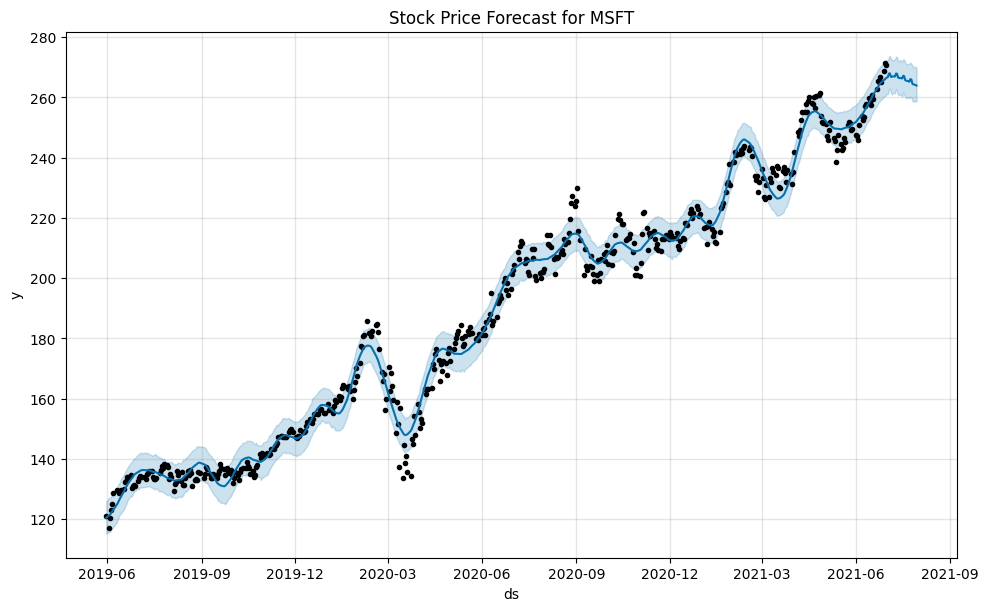

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/i8mthayg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/eub3kpaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54251', 'data', 'file=/tmp/tmpxwzzb_97/i8mthayg.json', 'init=/tmp/tmpxwzzb_97/eub3kpaq.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model0jldu1dw/prophet_model-20241222134923.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


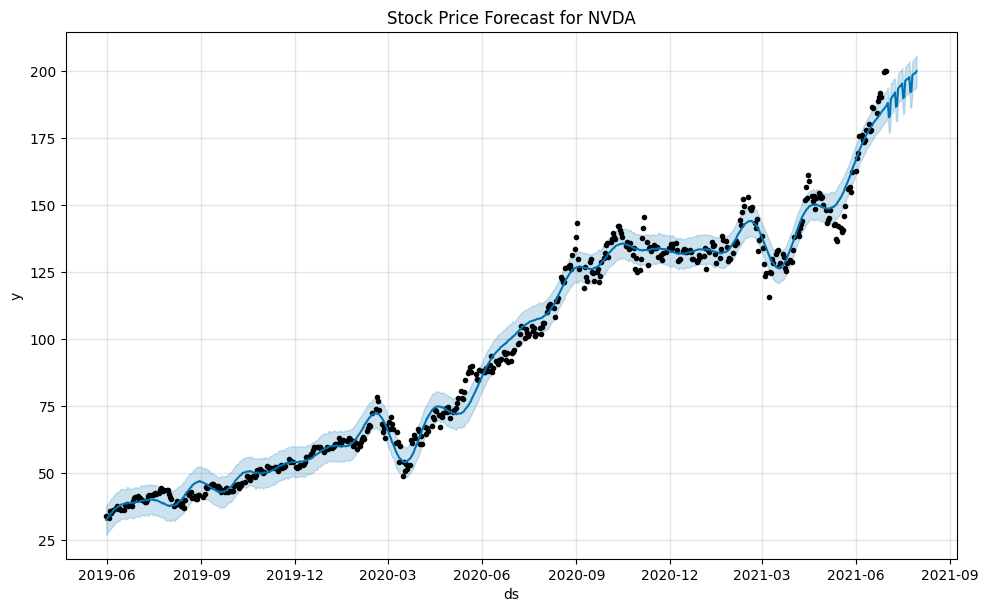

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/3m981o5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/yix8hi6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77124', 'data', 'file=/tmp/tmpxwzzb_97/3m981o5p.json', 'init=/tmp/tmpxwzzb_97/yix8hi6_.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_modelvu3sqku3/prophet_model-20241222134924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


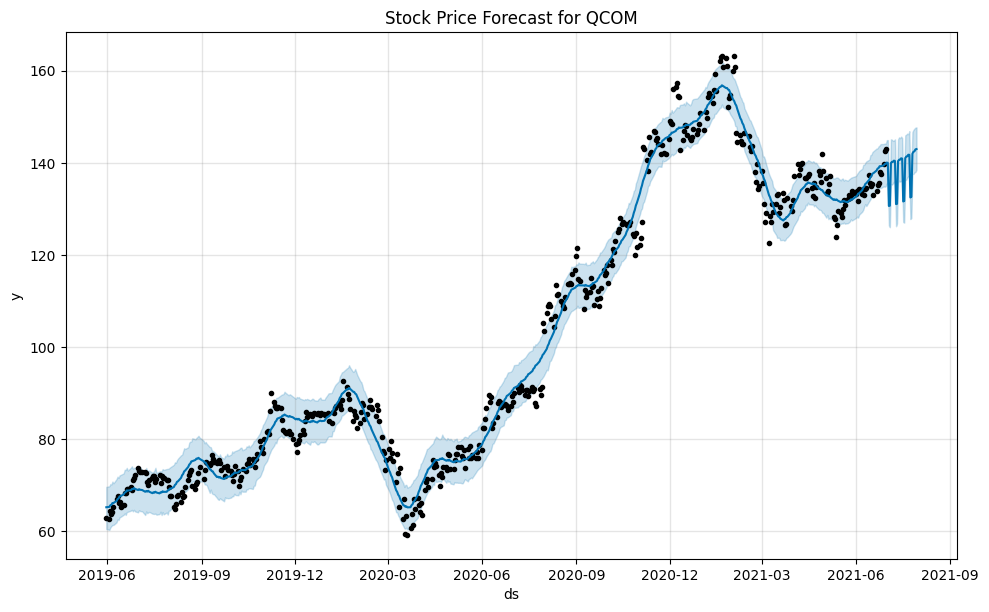

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/sz2e8ina.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/r2y2ibrk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58990', 'data', 'file=/tmp/tmpxwzzb_97/sz2e8ina.json', 'init=/tmp/tmpxwzzb_97/r2y2ibrk.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model1ewy17sw/prophet_model-20241222134924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


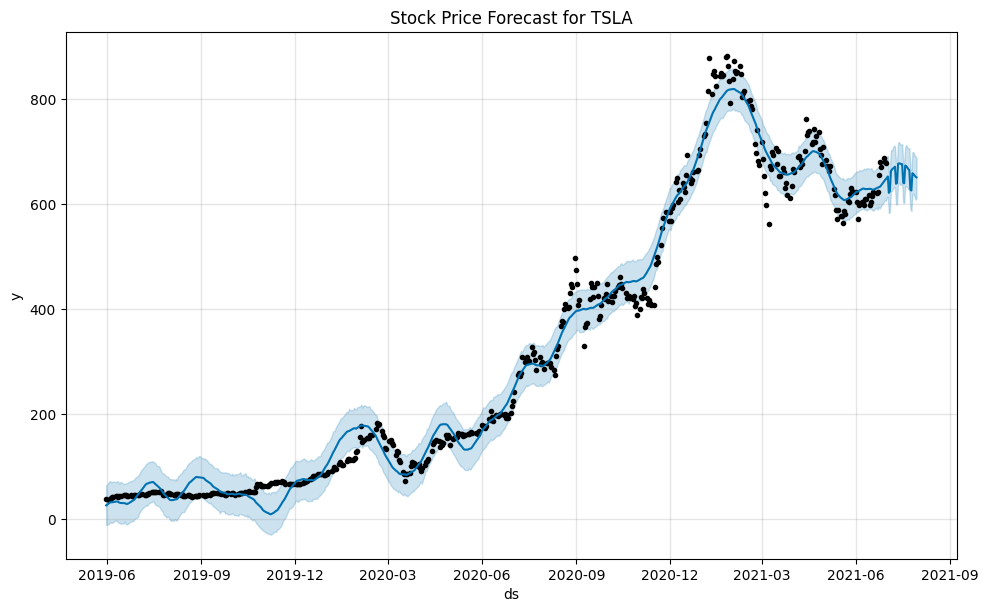

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/ehufjglr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxwzzb_97/s0v_au0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98828', 'data', 'file=/tmp/tmpxwzzb_97/ehufjglr.json', 'init=/tmp/tmpxwzzb_97/s0v_au0c.json', 'output', 'file=/tmp/tmpxwzzb_97/prophet_model69pri8x2/prophet_model-20241222134925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


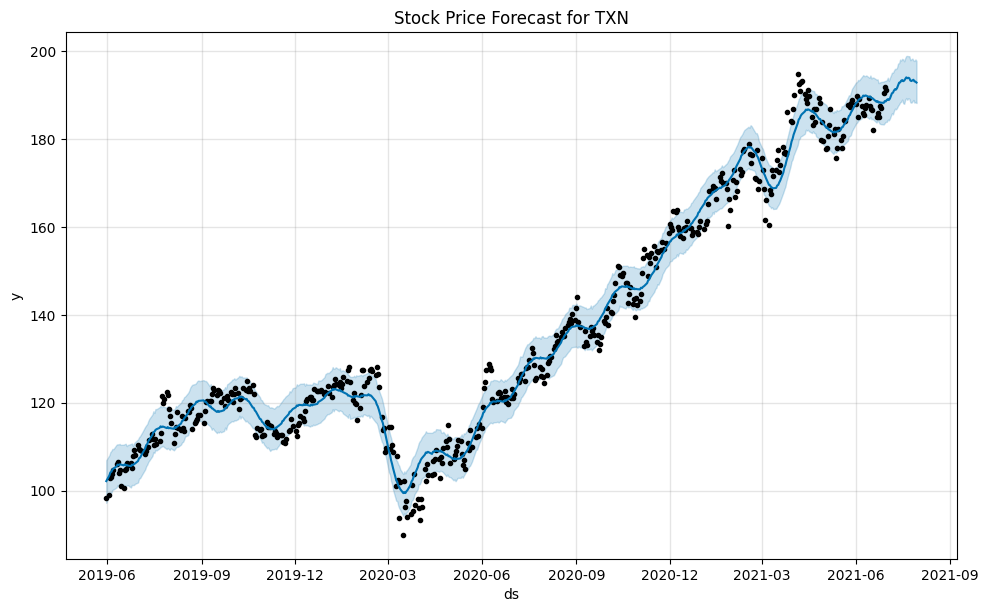

In [ ]:

from prophet import Prophet
import matplotlib.pyplot as plt

# Unique company names
companies = full_data['Company'].unique()

for company in companies:
    # Filter data for the company
    company_data = full_data[full_data['Company'] == company]

    # Prepare data for Prophet
    prophet_df = company_data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

    # Fit the model
    model = Prophet()
    model.fit(prophet_df)

    # Predictions
    future = model.make_future_dataframe(periods=30)  # Forecast 30 days into the future
    forecast = model.predict(future)

    # Plot predictions
    model.plot(forecast)
    plt.title(f'Stock Price Forecast for {company}')
    plt.show()


In [ ]:
forecast.to_csv('forecasted_stock_data.csv', index=False)
files.download('forecasted_stock_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>